In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.tsa.stattools as ts
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
data = pd.read_csv("/Users/sachinkelkar/desktop/ds-sf-29/data/Chicago_Train.csv")
data['Date'] = pd.to_datetime(data['Date']).dt.date
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.Domestic =data.Domestic.astype(float)
train = data[['Domestic']].resample('D').sum()
train=train.convert_objects(convert_numeric=True)
td = pd.read_csv("/Users/sachinkelkar/desktop/ds-sf-29/data/Chicago_Test.csv")
td['Date'] = pd.to_datetime(td['Date']).dt.date
td['Date'] = pd.to_datetime(td['Date'])
td.set_index('Date', inplace=True)
td.Domestic =td.Domestic.astype(float)
test = td[['Domestic']].resample('D').sum()

# Temporal Patterns in Reported Incidents of Domestic Violence
## City of Chicago Crime Data 2001 to Present

## Problem Statement

###  Determine if there is an association between number of reports of Domestic Violence to police and the season or day of the week using the Crime Incident Data from the City of Chicago from 2001 to 2016.

### The aim of the project is twofold: (1) Determine if there are temporal patterns in Domestic Violence, particularly patterns associated with holidays as often portrayed in the media; and, (2) If a pattern does exist, can we predict when there will be future spike in domestic violence so that law enforcement, survivors and advocates can better prepare.


## Data Set

### Source of Data:

The data used for this project comes from the City of Chicago Data Portal.  The Crime Incident data includes crime reported to the Chicago Police Department from 2001 to the present.  

### Timeframe: 

January 1, 2001 to December 31, 2016.  

### Variables: 
(1) Incident of Domestic Violence: From all the reported crimes, only those that qualified as "domestic-realted" under the Illinois Domestic Violence Statute were considered.  This is kept as a bollean with the City data set.  
(2) Date: The date and time of the occurence (or best estimated date of occurence) was taken for each reported incident.  






## Data Cleaning and Preparation

### Train and Test: 

The data was initially broken into a train and test set.  The train set contained data from January 1, 2001 through December 31, 2013.  The test set contained data from January 1, 2014 through Deceber 31, 2016.

### Preparing Train Set: 

(1) ensure that no null values exist; 
(2) Take the "time" element out of the date variable as this is uneccesary for the analysis; 
(3) Change the "Domestic" value from a boolean - True/False - to a float integer where every "true" equals "one," representing one report of domestic violence; 
(4) Transform the Date into a Datetimeindex; 
(5) The incidents of domestic violence are aggregated by day.  Thus, the data set contains the number of incidents reported per day.  




## Data Description

### Data Dictionary: 

Variable | Description | Type of Variable
---| ---| ---
Date| Date Incident Occured or Best Estimate | Categorical
Domestic | Report of a Domesic Violence Incidence as Defined under the Illinois Domestic Violence Statute | Continuous

### Data Overview: 
The train set contains 679,125 reported incidents of domestic violence from 2001 through 2013.  The mean number of reported incidents per day across the entire period was 143 with a standard deviation of 29.78.  The median was 140 incidents/day.  The highest number of incidents reported on a given day was 343 (Jan. 1, 2004) and the minimun number reported was 68 (Dec. 12, 2013).

In [17]:
# Data Head
train.head()

,Domestic
Date,
2001-01-01,281.0
2001-01-02,146.0
2001-01-03,162.0
2001-01-04,131.0
2001-01-05,159.0


### General Trends: Yearly and By Day Seasonality and Downward (non-stationary) 

The mean number of incidents per year across the 13 year period is 52,240.  In general, the number of incidents reported per year has decreased from 2001 to 2013.  In 2001, there were 58,686 reported incidents; in 2013, there were 44,839 reported incidents.  

Plotting the number of incidents per day across the entire 13 year period reveals a general downward trend across the 13 years, with clear seasonality.  

count       13.000000
mean     52240.384615
std       4224.209720
min      44839.000000
25%      50448.000000
50%      51301.000000
75%      53820.000000
max      61186.000000
Name: Domestic, dtype: float64


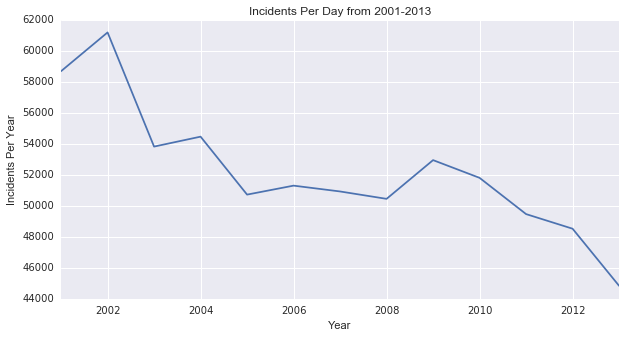

In [47]:
year = train["Domestic"].resample("A").sum()
print(year.describe())
year.plot(figsize=(10,5), title='Incidents Per Day from 2001-2013')
plt.xlabel('Year')
plt.ylabel('Incidents Per Year')

### Explore Spikes on Certain Days

I then plotted the number of daily incidents across the entire dataset, which revealed regular spikes, or outliers. In order to ascertain the date of the spikes, I reviewed the 20 days with the highest number of incidents across all 13 years.  Eleven of these top twenty days were New Years Days.  These days had over two standard deviations above the daily mean for the daya set (entire set mean = 143 - New Years Day range: 343 - 252).    This corresponded with the daily plot for which there is a sharp spike in incidents at the start of every year.  Seven of the remaining highest days all occured in June.  This also corresponded with the plot of incidents per day across the thirteen years - where spike are visible at the start of the year and at the end of the year.  Notably, Father's Day, in 2001, 2002, 2007, 2009 were each in the top 20 highest days across the 13 year period.

Looking individually by year, New Year's Day had the highest number of incidents in the respective year every year, except in 2002 and 2007.  In 2002 and 2007, New Year's Day had the secodn hghest number of incidents.  Father's day had the second highest number of incidents per year in 2001, 2006, 2009, 2010, 2011, and 2013. Father's Day was in the top 5 in 2002 and 2008.  The Fourth of July was in the top 5 in 2004, 2005, 2006, 2007, and 2012.

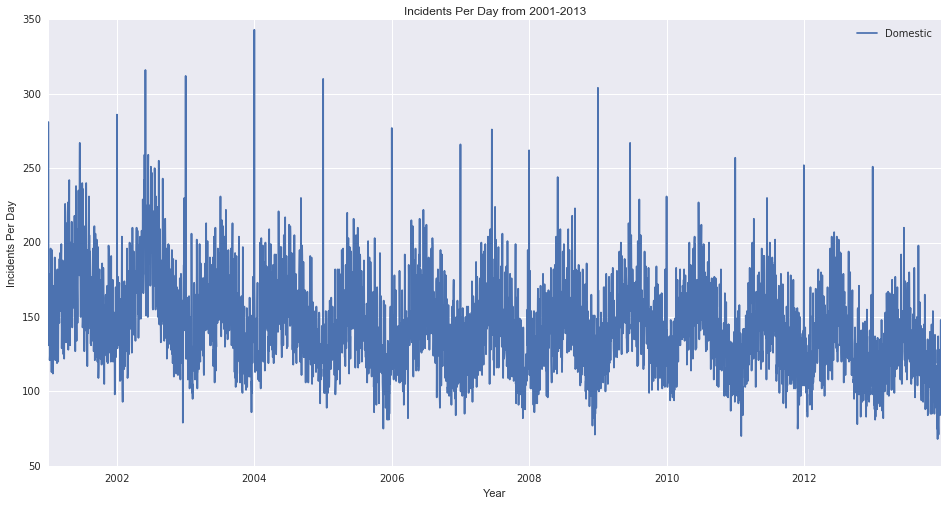

In [37]:
train.plot(figsize=(16,8), title='Incidents Per Day from 2001-2013')
plt.xlabel('Year')
plt.ylabel('Incidents Per Day')

In [16]:
train.describe()

,Domestic
count,4748.000000
mean,143.033909
std,29.786275
min,68.000000
25%,122.000000
50%,140.000000
75%,160.250000
max,343.000000


In [28]:
# Top 20 Highest Days from 2001 to 2013
train["Domestic"].nlargest(20)

Date
2004-01-01    343.0
2002-06-01    316.0
2003-01-01    312.0
2005-01-01    310.0
2009-01-01    304.0
2002-01-01    286.0
2001-01-01    281.0
2006-01-01    277.0
2007-06-17    276.0
2001-06-17    267.0
2009-06-21    267.0
2007-01-01    266.0
2008-01-01    262.0
2002-05-27    259.0
2002-06-16    259.0
2011-01-01    257.0
2002-08-11    255.0
2012-01-01    252.0
2001-06-16    251.0
2002-06-30    251.0
Name: Domestic, dtype: float64

### Trends by Month  - Summer months higher

The highest number of incidents per month all occured in May, June or July.  In every case, the month with the highest number of reported incidents was greater than one standard deviation higher than the mean for all the months in the entire year.  Given the fewer number of days in February, unspurprsingly, each year, February has the least amount of incidents per month across all thirteen years.

### Trends by Week - Summer weeks highest

When examining the numbers of incident per week, May, June and July each have weeks with the highest number of incidents per week.  December had the most weeks with the lowest number of incidents per year.  This indicates, that the Christmas Holiday season does not have a spike in incidents of domestic violence.

Date
2002-06-02    1658.0
2002-07-07    1519.0
2001-06-17    1511.0
2002-06-16    1435.0
2002-06-23    1415.0
2002-07-21    1408.0
2002-06-30    1392.0
2001-05-06    1364.0
2002-05-19    1347.0
2002-05-26    1340.0
Name: Domestic, dtype: float64
Date
2014-01-05    194.0
2013-12-15    646.0
2013-12-22    672.0
2005-12-11    695.0
2013-10-27    704.0
2011-02-06    712.0
2008-12-21    718.0
2012-01-22    721.0
2007-12-09    724.0
2013-12-08    724.0
Name: Domestic, dtype: float64


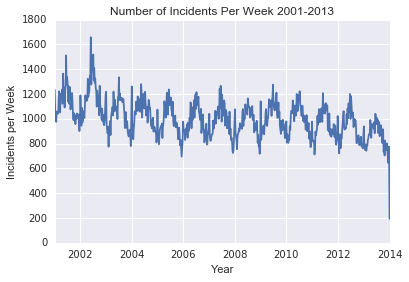

In [51]:
data1 = train["Domestic"].resample("W").sum()
print(data1.nlargest(10))
print(data1.nsmallest(10))
data1.plot(title='Number of Incidents Per Week 2001-2013')
plt.xlabel('Year')
plt.ylabel('Incidents per Week')

### Trends by day of the week - Saturday and Sunday Highest

Looking the number of incidents by day of the week reveals that the number of incidents spike on Saturday and Sunday.

# Model - ARIMA

    As a time seres, want to see if ARIMA model is plausible, so start by testing for autocorrelation.

## Autocorrelation
    There is some autocorrelation, though not very strong.  Highest autocorrelatio with one week - 0.61.

In [53]:
print('Autocorrelation 1: ', train['Domestic'].autocorr(1))
print('Autocorrelation 7: ', train['Domestic'].autocorr(7))
print('Autocorrelation 28: ', train['Domestic'].autocorr(28))
print('Autocorrelation 29: ', train['Domestic'].autocorr(29))
print('Autocorrelation 30: ', train['Domestic'].autocorr(30))
print('Autocorrelation 365: ', train['Domestic'].autocorr(365))

Autocorrelation 1:  0.558333188029
Autocorrelation 7:  0.613971643538
Autocorrelation 28:  0.552282699047
Autocorrelation 29:  0.404286743734
Autocorrelation 30:  0.225731220338
Autocorrelation 365:  0.500850188839


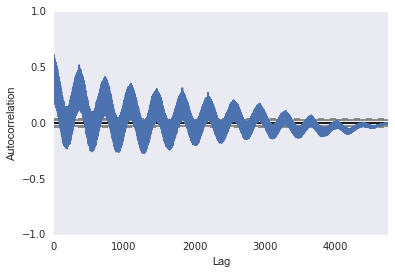

In [54]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(train['Domestic'])

## ACF and PACF Plots

### ACF and PACF appear to show some seasonality.  PACF shows that MA terms will be necessary because there are frequent shocks.   At least two AR terms would be necessary looking at the ACF plot.

Figure(480x320)
Figure(480x320)


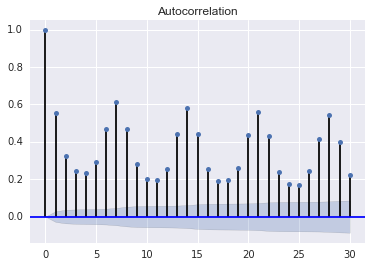

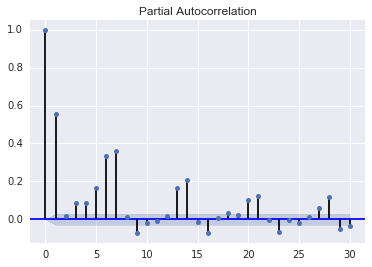

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
print(plot_acf(train, lags=30))
print(plot_pacf(train, lags=30))

## Train Models with Adjustments to make Stationary
    
    Looking at the plot of the daily incidents, there appears to be a trend and some seasonality.  Data appear to be non-stationary.  Thus, I initially tried to do some adjustments on an ARIMA model - differencing, log, exponentially weighting, rolling average.  In each case, after tuning the parameters, the best model had a mean absolute error of around 27 - 30.  Exponentially weighted has a mean absolute error of 17.

## Model with no Adjustments

I trained an ARMIA model on the data set without adjustments.  As with the above model attempts, any i terms vastly increased the errors, thus I just tried AR and MA terms.  In the end a ARMA(3,3) model had the least Mean Absolute Errors.  Based on the plot of the residuals and the test data versus predictions, it is clear the model does not properly account for spikes or outliers.  Some more adjustments are needed.

In [59]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.ARIMA(train, (3, 0, 3)).fit()
predictions = model.predict(
    '2014-01-01',
    '2017-01-02',
    dynamic=True, 
)
model.summary()
print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()
predictions.head()


/Users/sachinkelkar/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/sachinkelkar/anaconda/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


Mean absolute error:  16.6166955057


2014-01-01     91.864720
2014-01-02     97.111456
2014-01-03    109.003036
2014-01-04    118.609796
2014-01-05    118.726841
Freq: D, dtype: float64

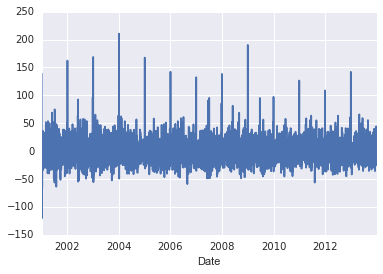

In [62]:
model.resid.plot()

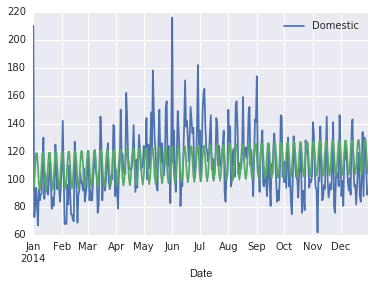

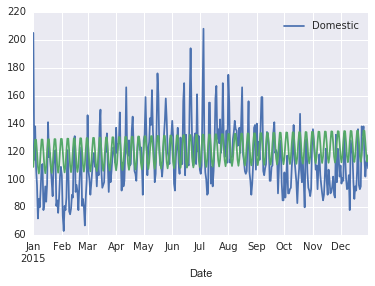

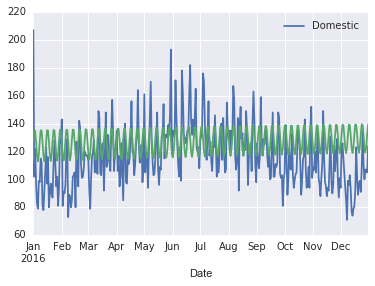

In [68]:
test["2014"].plot()
predictions["2014"].plot()
test["2015"].plot()
predictions["2015"].plot()
test["2016"].plot()
predictions["2016"].plot()